# **Our API key**

We assigned these permissions:

1. **Model Capabilitiers**: To access embeddings

2. **Assistants**: To access existent assistants, and generate answers

3. **Files**: To access the files required by the assistant to make use of enhanced context using **[RAG](https://help.openai.com/en/articles/8868588-retrieval-augmented-generation-rag-and-semantic-search-for-gpts)**

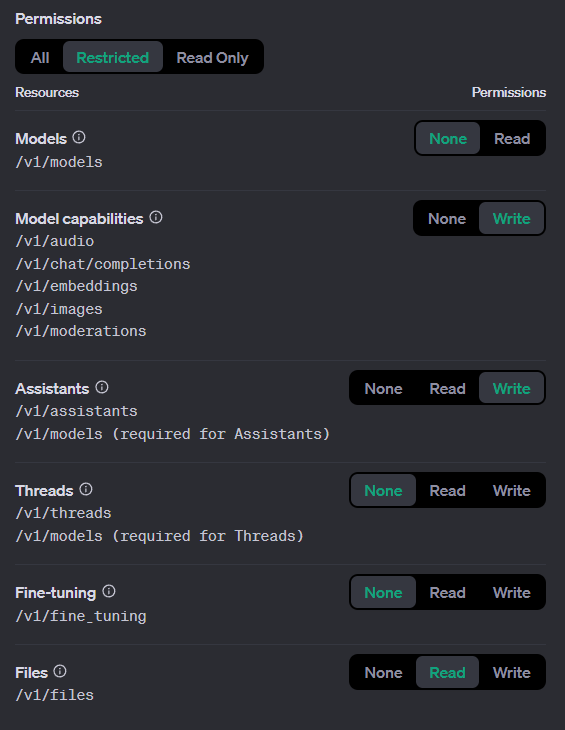



**Assistant ID**: asst_VQ7WcdlhjPfDDYJLkobO0VsB

## Expected Information by the gpt-4 assistant call

```txt
[URL]EXAMPLE_URL
[PERCENTAGE]EXAMPLE_PERCENTAGE%
```

In [6]:
## retrieving the assistant object

import requests

assistant_id = 'asst_VQ7WcdlhjPfDDYJLkobO0VsB'
api_key = ## PUT API KEY HERE

headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json',
    'OpenAI-Beta': 'assistants=v2'
}

response = requests.get(f'https://api.openai.com/v1/assistants/{assistant_id}', headers=headers)
assistant = response.json()
print(assistant)


{'id': 'asst_VQ7WcdlhjPfDDYJLkobO0VsB', 'object': 'assistant', 'created_at': 1714315131, 'name': 'phishing_url_analyzer', 'description': None, 'model': 'gpt-4-turbo', 'instructions': 'You are a phishing URL analyzer.\n\nYou will receive an URL alongside a prediction  stating if such URL is phishing or not (with an accompanying number stating the probability of that URL being phishing)\n\n', 'tools': [{'type': 'file_search'}], 'top_p': 1.0, 'temperature': 1.0, 'tool_resources': {'file_search': {'vector_store_ids': []}}, 'metadata': {}, 'response_format': 'auto'}


---

## Example api call that get rejected by the Assistant



In [10]:
from openai import OpenAI

# Initialize the OpenAI client with your API key (for some reason Project API keys dont work, only User API Keys work)

# REMOVE REMOVE BEFORE PRODUCTION AND ADD TO ENVIRONMENT VARIABLES
client = OpenAI(api_key=" !!!!!!!!!!! CHANGE THE API KEY HERE!!!!!!!!!!!!!!!" )

# Retrieve our existing assistant (This is public)
assistant_id = 'asst_VQ7WcdlhjPfDDYJLkobO0VsB'  #  assistant's ID

# Step 1: Retrieve the Assistant by ID
assistant = client.beta.assistants.retrieve(assistant_id)

# Step 2: Create a Thread (we cant use assistants without a thread)
# A THREAD is a bunch of messages that signalize a conversation
thread = client.beta.threads.create()

# Step 3: Add a Message to the Thread 
# a message must have the thread id, the role (user or assistant) and the content (the message itself)
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="I need to solve the equation `3x + 11 = 14`. Can you help me?"
)

# Step 4: Create and poll a Run to generate a response from the assistant
run = client.beta.threads.runs.create_and_poll(
    thread_id=thread.id,
    assistant_id=assistant.id
    )

# Step 5: Once the Run completes, retrieve the assistant's messages
if run.status == 'completed':
    messages = client.beta.threads.messages.list(thread_id=thread.id)
    for message in messages.data:
        if message.role == 'assistant':  # Look for messages from the assistant
            print(message.content)  # This is the assistant's response <----#--#--#--#--#---------------RESPONSE
else:
    print(f"Run status: {run.status}")




# Deleting the thread to optimize space
headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json',
    'OpenAI-Beta': 'assistants=v2'
}

response = requests.delete(f'https://api.openai.com/v1/threads/{thread.id}', headers=headers)
if response.status_code == 200:
    print("Thread deleted successfully:", response.json())
else:
    print("Failed to delete thread:", response.json())

[TextContentBlock(text=Text(annotations=[], value='SORRY, MY PURPOSE IS TO ONLY ANALYZE URLS.'), type='text')]
Thread deleted successfully: {'id': 'thread_ZTbEKi2dkyBY593GWRMs7xzL', 'object': 'thread.deleted', 'deleted': True}


---

## **Example api call that gets approved by the assistant**



In [13]:
from openai import OpenAI

# Initialize the OpenAI client with your API key (for some reason Project API keys dont work, only User API Keys work)

# REMOVE REMOVE BEFORE PRODUCTION AND ADD TO ENVIRONMENT VARIABLES
client = OpenAI(api_key=" !!!!!!!!!!! CHANGE THE API KEY HERE!!!!!!!!!!!!!!!" )

# Retrieve our existing assistant (This is public)
assistant_id = 'asst_VQ7WcdlhjPfDDYJLkobO0VsB'  #  assistant's ID

# Step 1: Retrieve the Assistant by ID
assistant = client.beta.assistants.retrieve(assistant_id)

# Step 2: Create a Thread (we cant use assistants without a thread)
# A THREAD is a bunch of messages that signalize a conversation
thread = client.beta.threads.create()

# Step 3: Add a Message to the Thread 
# a message must have the thread id, the role (user or assistant) and the content (the message itself)
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="[URL]https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments\n[PERCENTAGE]99.998%"
)

# Step 4: Create and poll a Run to generate a response from the assistant
run = client.beta.threads.runs.create_and_poll(
    thread_id=thread.id,
    assistant_id=assistant.id
    )

# Step 5: Once the Run completes, retrieve the assistant's messages
if run.status == 'completed':
    messages = client.beta.threads.messages.list(thread_id=thread.id)
    for message in messages.data:
        if message.role == 'assistant':  # Look for messages from the assistant
            print(message.content)  # This is the assistant's response <----#--#--#--#--#---------------RESPONSE
            test_structure = message.content
else:
    print(f"Run status: {run.status}")




# Deleting the thread to optimize space (we cant, lacking permissions in our velez reyez org)
headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json',
    'OpenAI-Beta': 'assistants=v2'
}

response = requests.delete(f'https://api.openai.com/v1/threads/{thread.id}', headers=headers)
if response.status_code == 200:
    print("Thread deleted successfully:", response.json())
else:
    print("Failed to delete thread:", response.json())

[TextContentBlock(text=Text(annotations=[], value="- The URL 'https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments' features a domain name 'example-phishing-site123.com' that raises strong suspicions of being a phishing site, especially when compared to common legitimate websites.\n- The unusual use of a specific port '8080' along with complex URL parameters and paths suggests an attempt to confuse the user or obscure malicious content.\n- The extraordinarily high certainty percentage of 99.998% indicates that there are multiple strong indicators that this URL is indeed a phishing attempt.\n- The URL uses secure HTTPS protocol, which might give a false sense of security; however, phishing sites increasingly use HTTPS to appear legitimate.\n- Users are strongly advised to avoid this URL, refrain from entering any personal or financial information, and verify any unexpected requests through known official channels."), type='text

In [19]:
# Access the first TextContentBlock in the list
content_block = test_structure[0]

# Access the Text object from the TextContentBlock
text_object = content_block.text

# Access the 'value' property from the Text object
message = text_object.value

print(message)

- The URL 'https://www.example-phishing-site123.com:8080/login/search_results?q=search#&sort=relevance&filter=on#!/comments' features a domain name 'example-phishing-site123.com' that raises strong suspicions of being a phishing site, especially when compared to common legitimate websites.
- The unusual use of a specific port '8080' along with complex URL parameters and paths suggests an attempt to confuse the user or obscure malicious content.
- The extraordinarily high certainty percentage of 99.998% indicates that there are multiple strong indicators that this URL is indeed a phishing attempt.
- The URL uses secure HTTPS protocol, which might give a false sense of security; however, phishing sites increasingly use HTTPS to appear legitimate.
- Users are strongly advised to avoid this URL, refrain from entering any personal or financial information, and verify any unexpected requests through known official channels.
